In [7]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use(['science','notebook', 'grid'])
import numba
from numba import njit 
from scipy.ndimage import convolve, generate_binary_structure
from mpl_toolkits import mplot3d 
%matplotlib inline

In [8]:
# we will make a 50x50 grid
N = 4

In [9]:
# Random numbers of a N by N by N cube
# np.random.random creates an array of shape (x, y, z,...) and randomly assigns numbers with a uniform distribution over [0, 1).
initial_random = np.random.rand(N,N)
# print(initial_random)

# Now using this, we can set if something is > 0.25 it will be positive 1
# If something is < 0.25 then it will be -1
# This will allow for about 25% to be -1 then 75% to be +1

#first create an array to store these numbers
lattice_neg = np.zeros((N,N))
# print(lattice_neg)
# now put that array in itself
lattice_neg[initial_random <0.75] = -1
lattice_neg[initial_random >=0.75] = 1
# print(lattice_neg)

initial_random = np.random.rand(N,N)
# print(initial_random)
lattice_pos = np.zeros((N,N))
lattice_pos[initial_random < 0.25] = -1
lattice_pos[initial_random >= 0.25] = 1
print(lattice_pos)

[[ 1.  1.  1.  1.]
 [-1.  1.  1.  1.]
 [ 1. -1. -1. -1.]
 [ 1.  1.  1.  1.]]


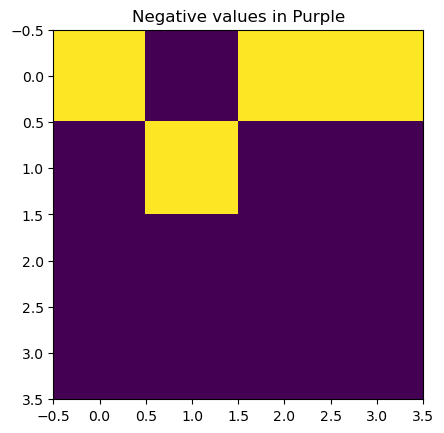

In [10]:
plt.figure()
plt.imshow(lattice_neg)
plt.title("Negative values in Purple")
# plt.imshow(lattice_pos)
plt.show()

# not at equilibirum, in initial state and will be put into temperature bath
# Roughly 75% up spin (purple) and 25% negative spins (yellow)

In [38]:
# Now that we have our initial sets of + 1 and -1 spins
# We need the Metropolis method to flip these spins. 

# Dimensionless qt 

def get_energy(lattice):
    # create only the nearest neighbors
    kern = generate_binary_structure(2,1)
    # Do not use the center piece, change it to false
    kern[1][1] = False
    # convolution and multiple to the lattice
    arr = -lattice * convolve(lattice, kern, mode="constant")
    # sum up the array vallues
    return np.sum(arr)

In [44]:
# kern = generate_binary_structure(2,1)
# print(kern)
# kern[1][1] = False
# print(kern)   
# # represents the nearest neighbor where a false is surrounded by "True" or neighbors
# print(lattice_neg)
# arr = - lattice_neg * convolve(lattice_neg, kern)
# print(arr)
# arr = - lattice_neg * convolve(lattice_neg, kern, mode ="constant")
# print(arr)
# print(np.sum(arr))

# print(get_energy(lattice_neg))

In [ ]:
# Metropolis Algorithm
# BJ is the temperature
# initial lattice of ups and downs--> spin_arr
# number of iterations of going through algorithm--> time
# BJ = temperature (B = 1/(KT)) ???
# initial energy of the lattice = energy (initial_energy)
def metropolis (spin_arr, times, BJ, energy):
    spin_arr = spin_arr.copy()
    # calculate the net spin and net energy as it changes as the spin flips
    net_spins = np.zeros(times-1)
    net_energy = np.zeros(times-1)

    # pick a random point in the lattice and flip the spin
    for t in range (0, times -1):
        # pick random coordinates x and y
        x = np.random.randint(0,N)
        y = np.random.randint(0,N)
        # with random x and y coordinate, find the spin (-1 or 1)
        # initial spin
        spin_i = spin_arr[x][y]
        # flip the spin (aka spin_f) by mult. by -1
        spin_f = -1 * spin_i

        # compute the change in energy with the change of spin
        # energy starts at zero
        E_i = 0
        E_f = 0
        
        # energy from the neighbors totaled up 
        # (other option is create E_i = the summ of all of them but that's super long code

        # position to the left 
        E_i = E_i + -1*spin_i*spin_arr[x-1][y]
        E_f = E_f + -1*spin_f*spin_arr[x-1][y]

        # position to the right (added to the energy from the left neighbors)
        E_i += -1*spin_i*spin_arr[x+1][y]
        E_f += -1*spin_f*spin_arr[x+1][y]

        # position above (added to the energy of the left and right neighbors)
        E_i += -1*spin_i*spin_arr[x][y+1]
        E_f += -1*spin_f*spin_arr[x][y+1]
    
        # positive below
        E_i += -1*spin_i*spin_arr[x][y-1]
        E_f =+ -1*spin_f*spin_arr[x][y-1]

        dE = E_f - E_i
        


In [52]:
print(lattice_neg)
print(lattice_neg[0][1]) # initial spin
print(-1*lattice_neg[0,1]) # spin flip

print(lattice_neg[0,1])

# is [x][y] different from [x,y]

[[ 1. -1.  1.  1.]
 [-1.  1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]]
-1.0
1.0
-1.0


In [45]:
# x = np.random.randint(0,N)
# print(x)
# size = 10
# arr=np.random.randint(0,2, size)
# arr[arr ==0] = -1
# print(arr)

0
[-1  1 -1  1 -1 -1  1  1 -1  1]
